In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import epyestim
import epyestim.covid19 as covid19
import seaborn as sns
import scipy.stats
from minepy import MINE

In [2]:
path="../2021data/"
daily = pd.read_csv(path+"2021_daily_cases.csv",parse_dates=["date"],index_col="date")

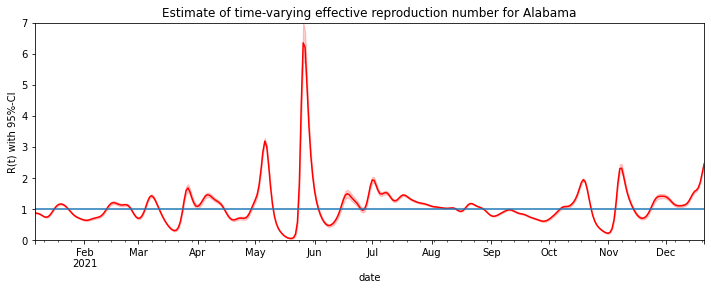

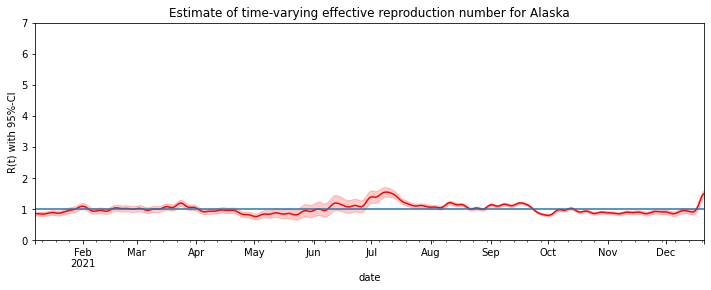

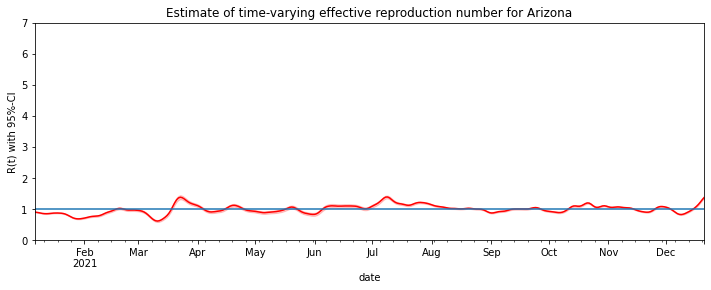

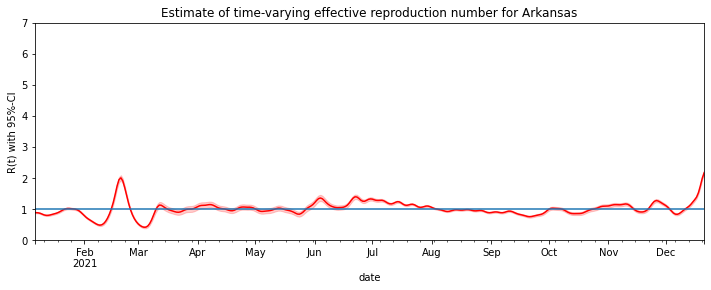

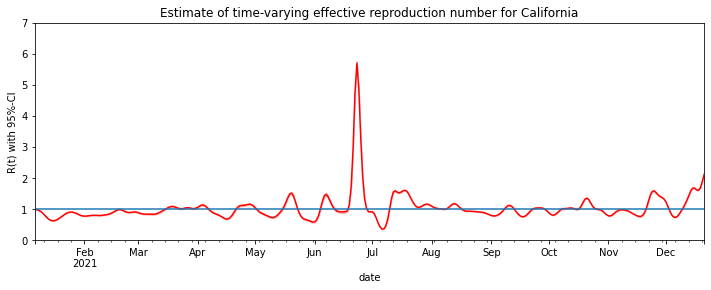

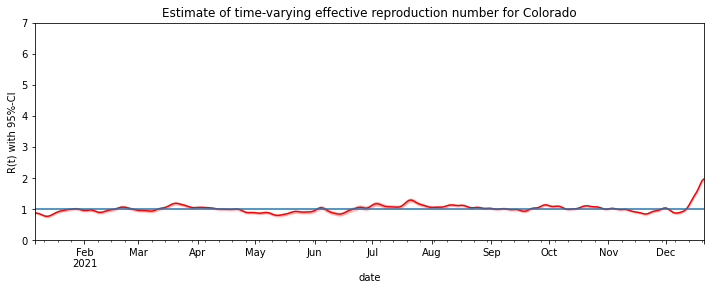

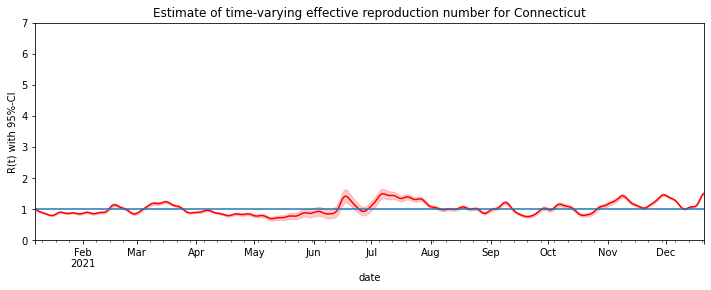

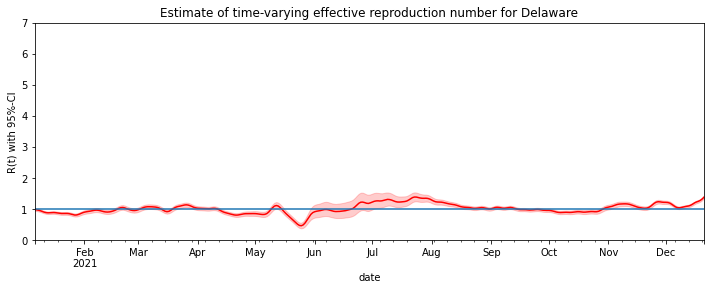

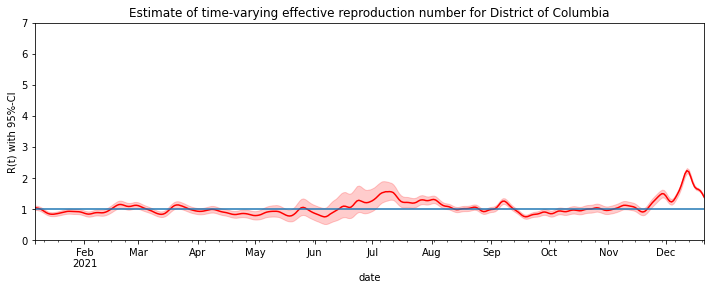

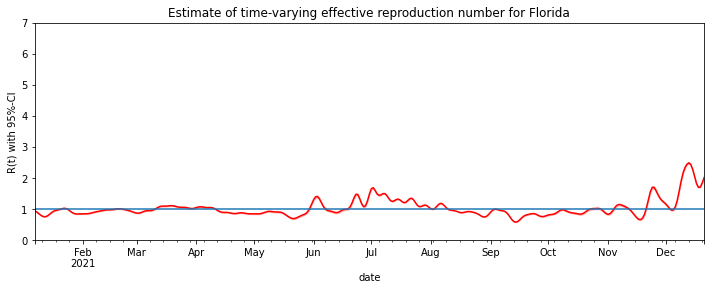

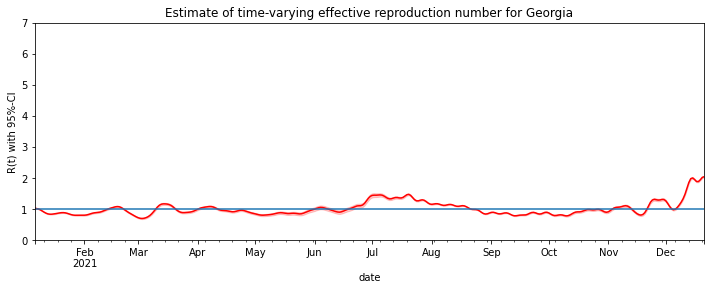

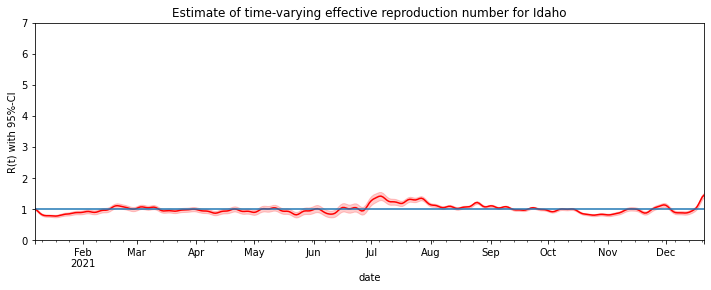

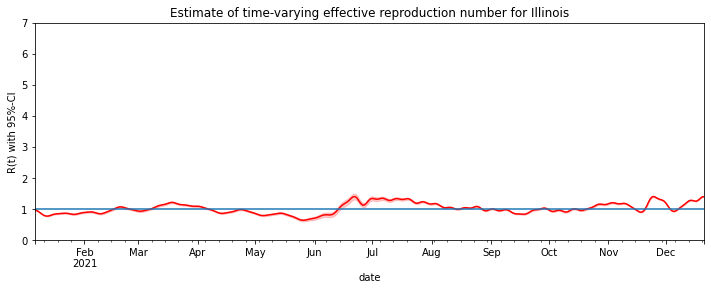

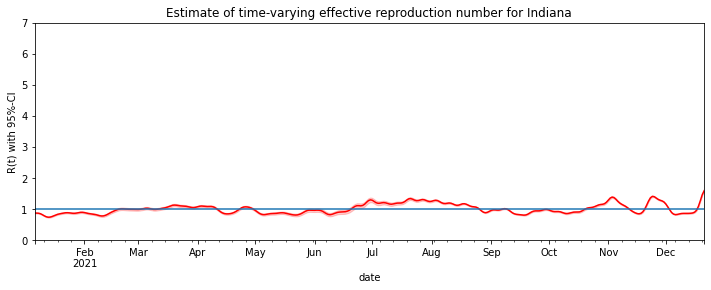

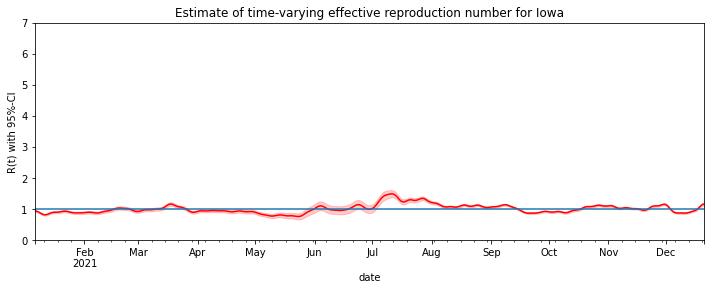

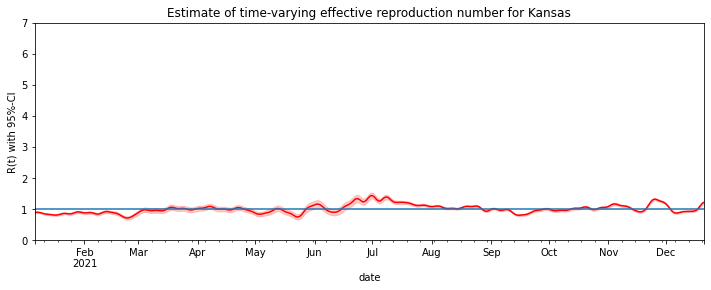

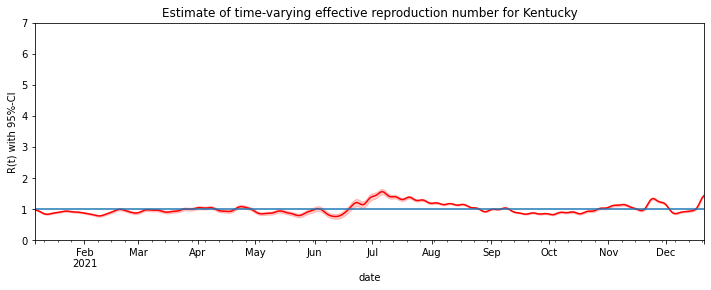

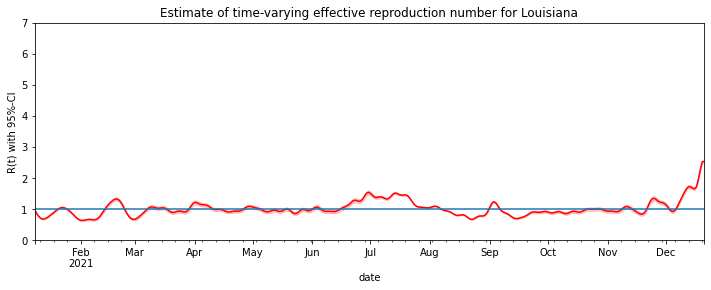

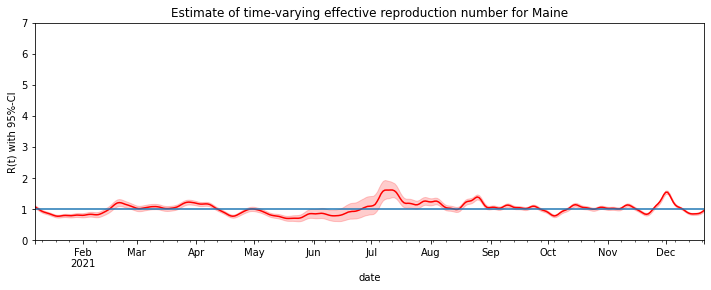

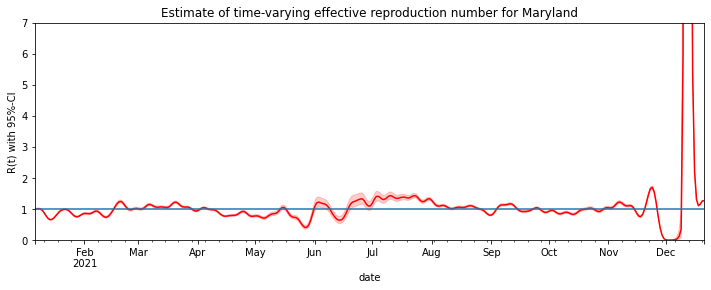

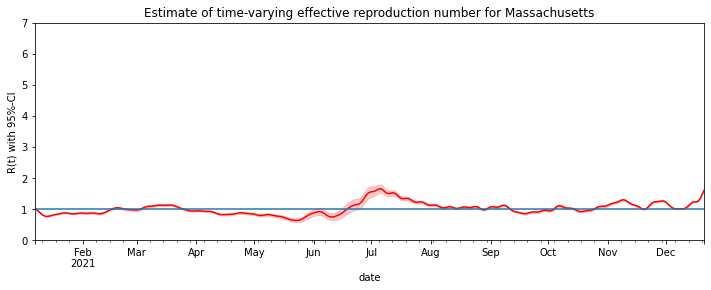

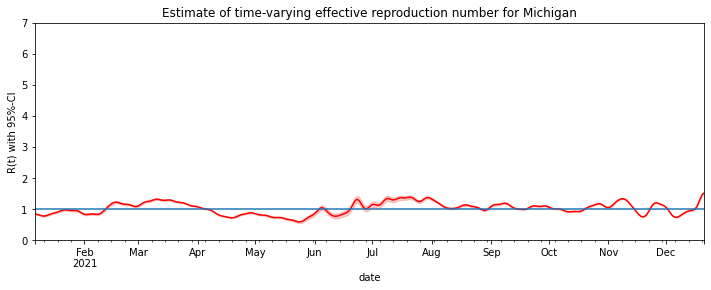

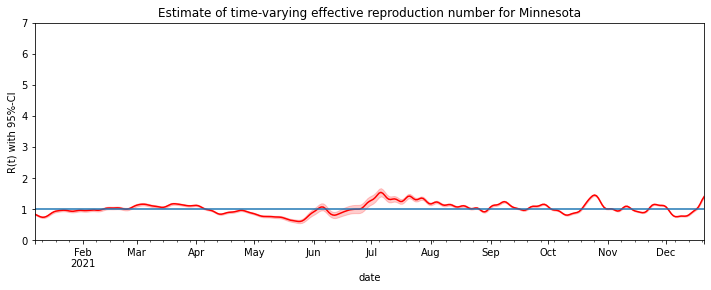

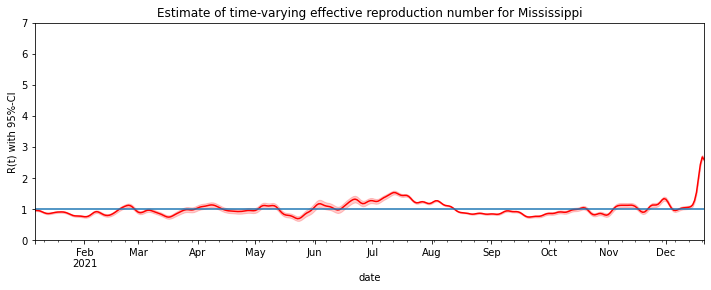

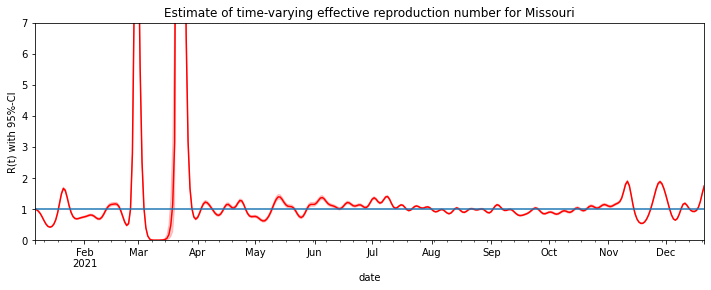

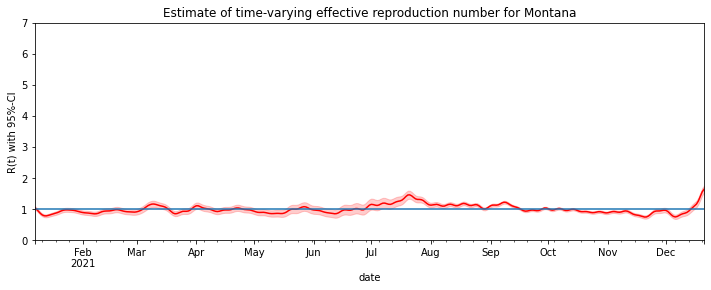

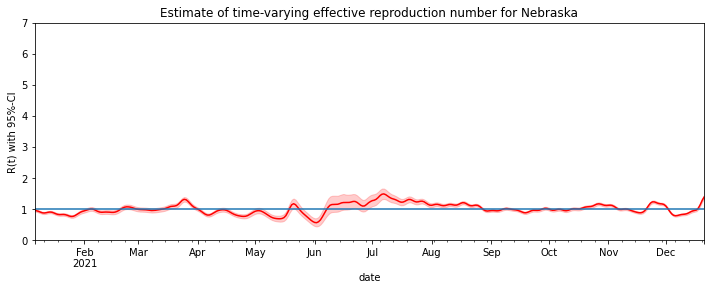

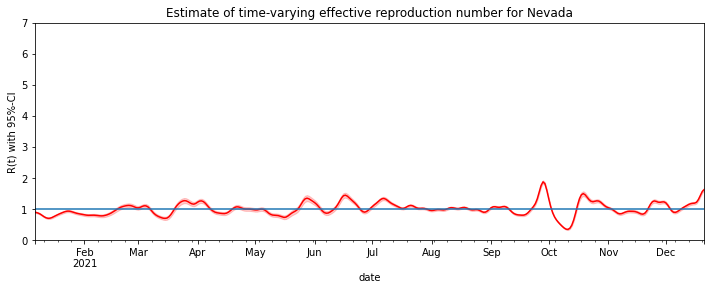

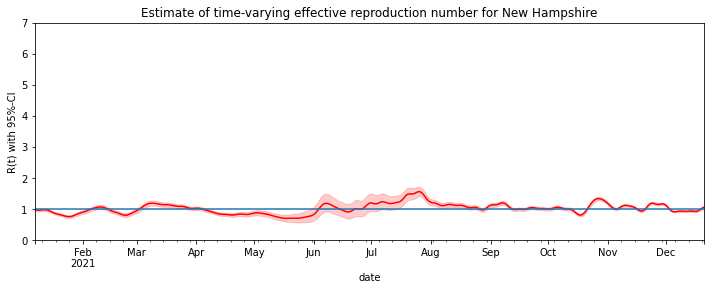

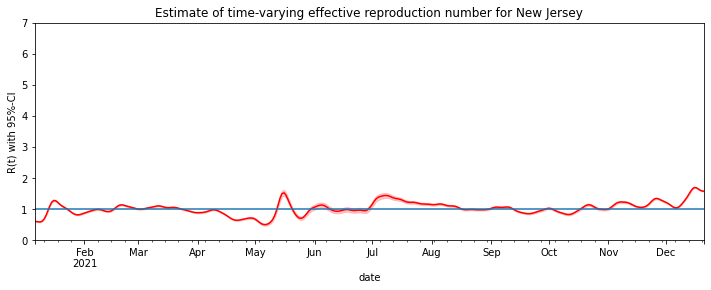

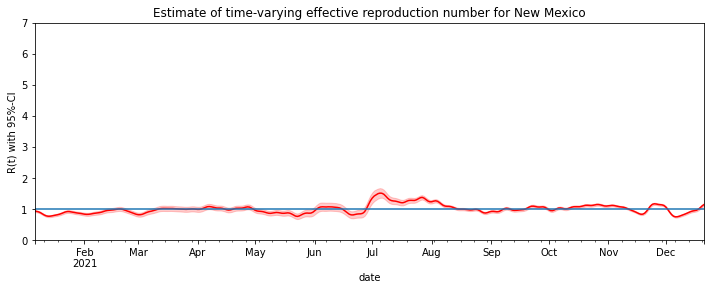

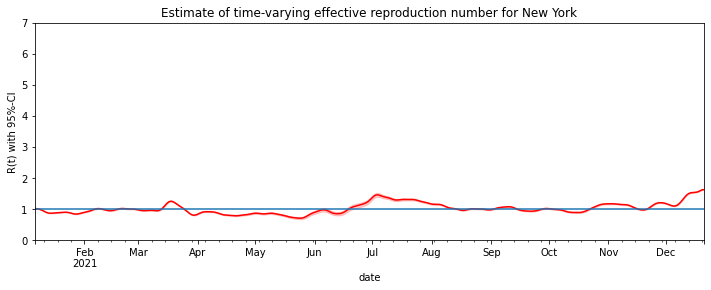

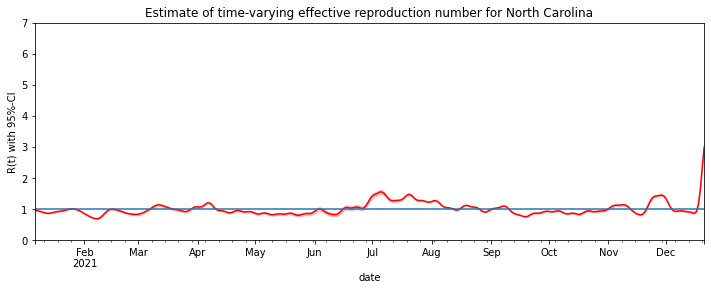

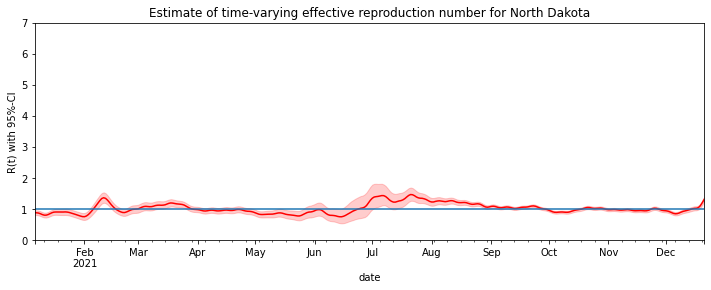

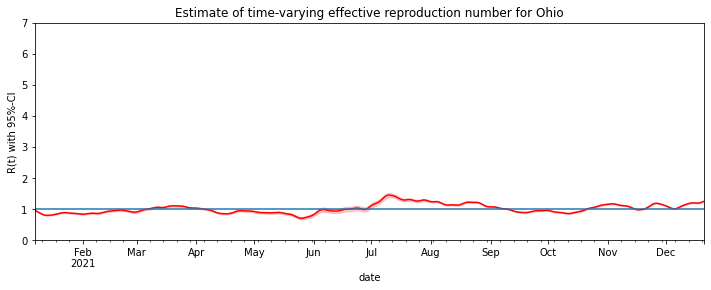

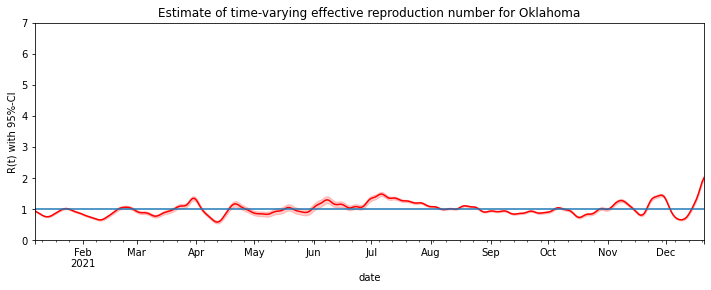

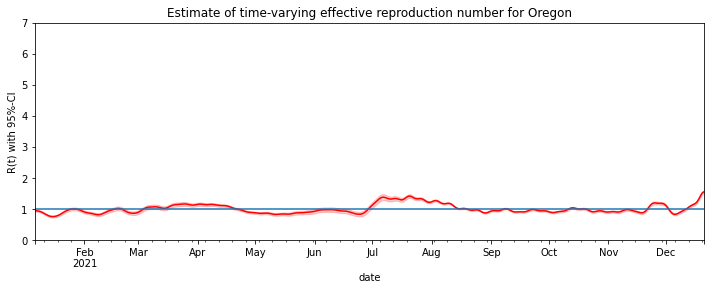

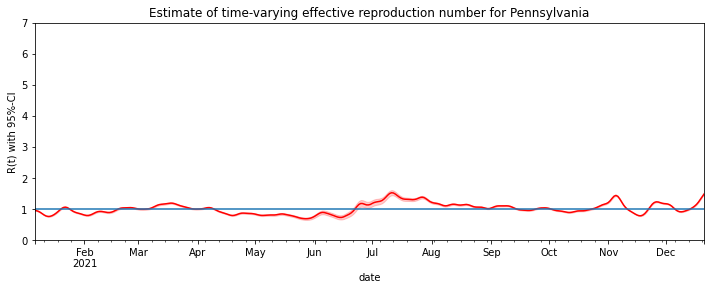

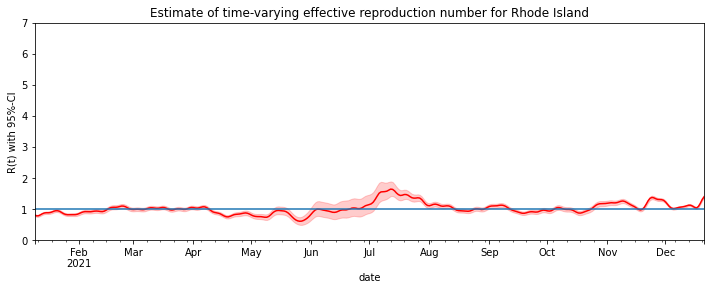

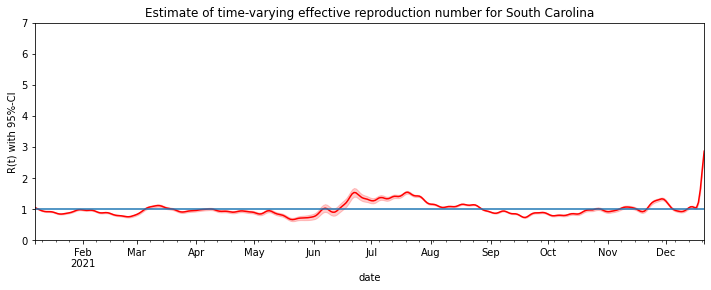

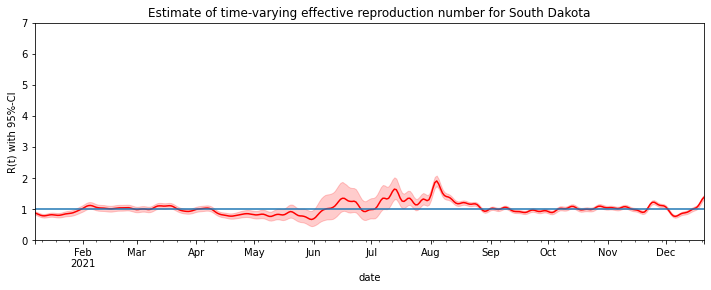

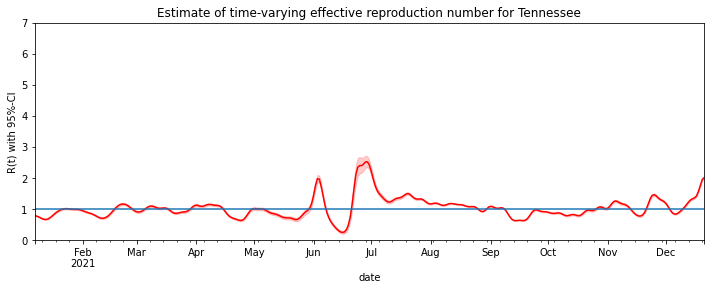

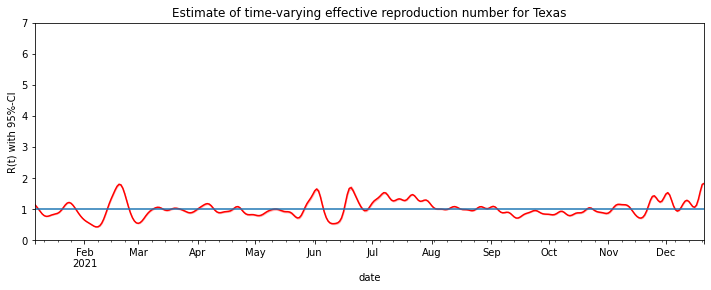

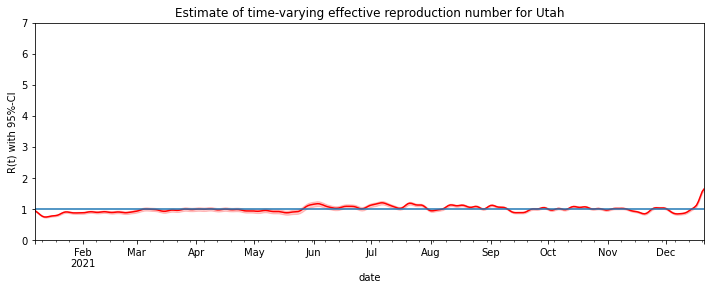

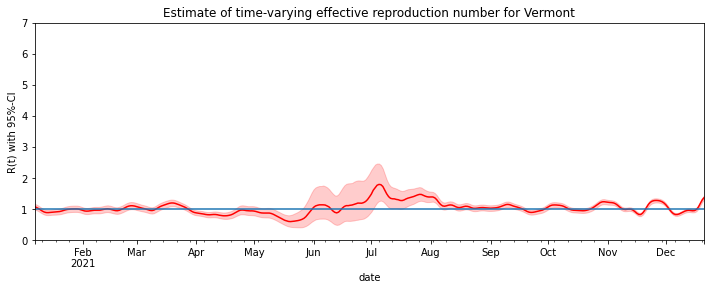

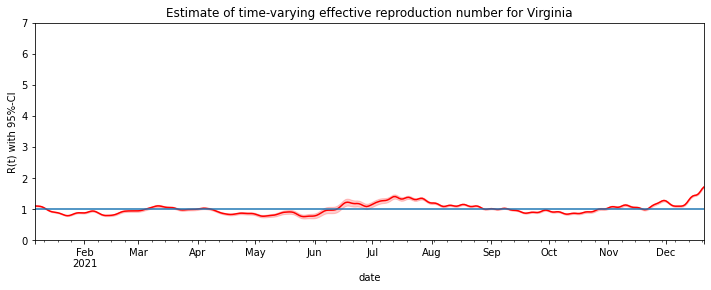

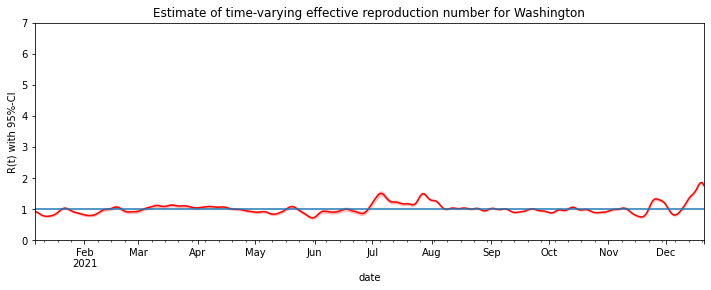

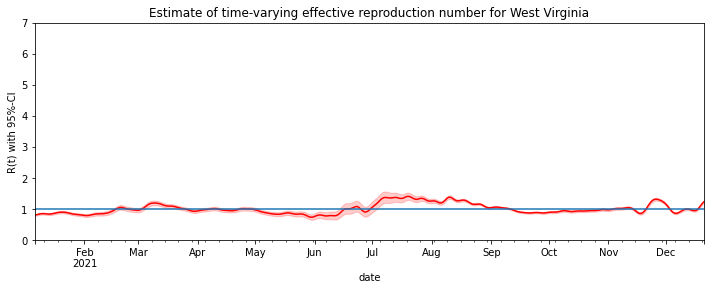

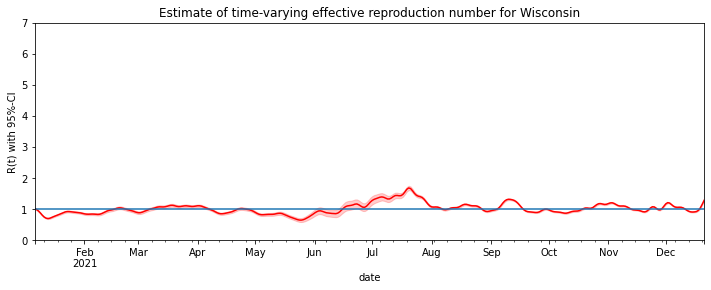

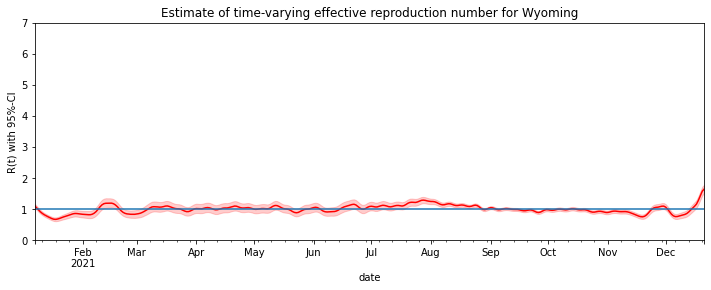

In [3]:
for s in daily.columns:
    temp=daily[s]
    temp[temp<0]=0 #special treatment for Texas
    ch_time_varying_r = covid19.r_covid(temp)
    fig, ax = plt.subplots(1,1, figsize=(12, 4))

    ch_time_varying_r.loc[:,'Q0.5'].plot(ax=ax, color='red')
    ax.fill_between(ch_time_varying_r.index, 
                        ch_time_varying_r['Q0.025'], 
                        ch_time_varying_r['Q0.975'], 
                        color='red', alpha=0.2)
    ax.set_xlabel('date')
    ax.set_ylabel('R(t) with 95%-CI')
    ax.set_ylim([0,7])
    ax.axhline(y=1)
    ax.set_title(f'Estimate of time-varying effective reproduction number for {s}')
    plt.show()

In [3]:
from ern import *

In [4]:
df = get_ern(daily)

In [5]:
df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2021-01-07,0.869035,0.854551,0.889573,0.889912,0.971817,0.866807,0.974576,0.972744,1.042130,0.917478,...,0.864033,0.779776,1.007248,0.926139,1.071132,1.097401,0.874849,0.837303,0.953443,1.059664
2021-01-08,0.835092,0.851971,0.873051,0.865905,0.939173,0.840549,0.933639,0.951729,1.015037,0.864740,...,0.834738,0.754684,0.913917,0.868391,1.033281,1.094506,0.828388,0.853690,0.876888,0.979840
2021-01-09,0.790056,0.846241,0.861767,0.835912,0.889240,0.809081,0.905041,0.926267,0.977767,0.810693,...,0.806290,0.722441,0.835247,0.810668,0.987165,1.077533,0.794370,0.860676,0.799683,0.914987
2021-01-10,0.748919,0.841638,0.853687,0.809325,0.823843,0.781193,0.888368,0.903087,0.933493,0.766038,...,0.786250,0.688405,0.781126,0.765451,0.944032,1.045559,0.774002,0.857396,0.736303,0.864340
2021-01-11,0.729151,0.844090,0.851361,0.796533,0.751017,0.766076,0.871592,0.887466,0.891723,0.744421,...,0.782883,0.665221,0.758349,0.742128,0.908782,1.004698,0.765126,0.848204,0.698874,0.823621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,1.628545,1.103778,1.148327,1.471806,1.547911,1.626331,1.174998,1.251946,1.641265,1.638259,...,1.086414,1.508252,1.271748,1.207267,1.044780,1.464252,1.740929,1.000706,0.941854,1.257464
2021-12-18,1.826212,1.325549,1.224454,1.718848,1.633953,1.802740,1.352291,1.268950,1.624356,1.660378,...,1.223228,1.772973,1.588956,1.422036,1.185151,1.561492,1.896765,1.108235,1.030887,1.459013
2021-12-19,2.119920,1.477210,1.311700,1.999152,1.836237,1.945138,1.481658,1.327862,1.522011,1.811211,...,1.336931,1.981591,1.856188,1.591384,1.307157,1.667854,1.894461,1.200585,1.155733,1.613142


In [9]:
cci=pd.read_csv(path+'2021_state_cci.csv',index_col = "date")[6:-10]

In [10]:
cci

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2021-01-07,3.96,0.61,3.16,3.24,2.17,2.02,1.79,2.27,4.10,5.27,...,1.54,3.79,3.88,2.41,1.02,1.59,1.41,1.67,1.45,1.17
2021-01-08,4.29,0.64,3.31,3.44,2.27,2.05,1.89,2.33,4.05,5.54,...,1.57,3.75,4.12,2.48,0.97,1.65,1.47,1.74,1.51,1.22
2021-01-09,4.36,0.65,3.33,3.50,2.28,1.96,1.87,2.25,3.96,5.55,...,1.58,3.60,4.18,2.48,1.04,1.64,1.47,1.72,1.53,1.22
2021-01-10,4.44,0.65,3.37,3.53,2.29,1.91,1.90,2.25,3.96,5.60,...,1.63,3.58,4.11,2.48,1.07,1.66,1.50,1.74,1.55,1.22
2021-01-11,4.48,0.67,3.37,3.54,2.28,1.86,1.92,2.28,3.97,5.62,...,1.64,3.57,4.12,2.47,1.06,1.66,1.49,1.73,1.55,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,12.95,4.10,13.57,9.83,11.52,6.76,6.07,7.34,6.63,14.94,...,4.63,11.01,13.63,8.20,2.39,4.81,7.00,5.99,5.08,3.86
2021-12-18,12.97,4.15,13.46,9.81,11.57,6.85,6.16,7.49,6.56,14.90,...,4.67,11.08,13.48,8.39,2.44,4.81,7.04,6.06,5.06,3.78
2021-12-19,12.96,4.23,13.61,9.83,11.71,6.98,6.26,7.62,6.70,15.05,...,4.69,11.11,13.48,8.48,2.52,4.82,7.15,6.04,4.94,3.76


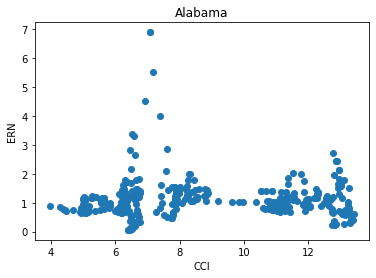

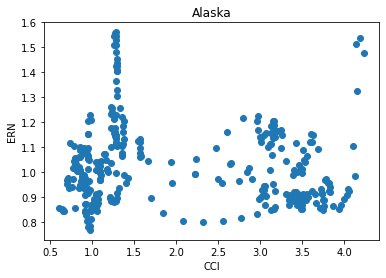

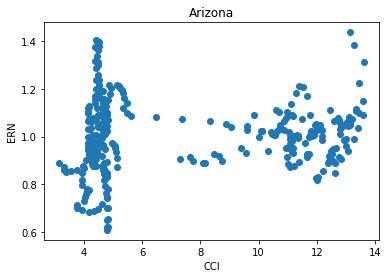

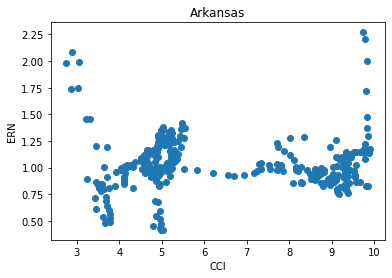

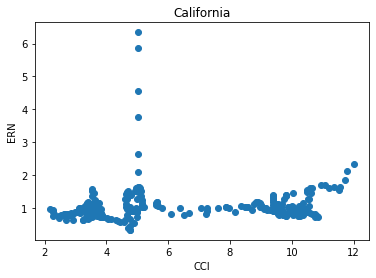

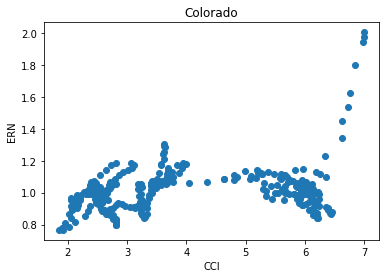

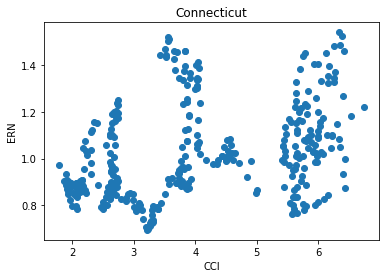

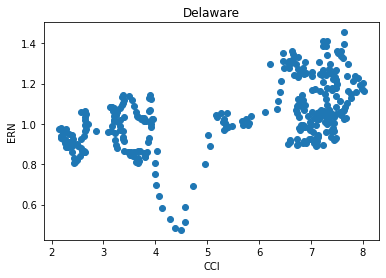

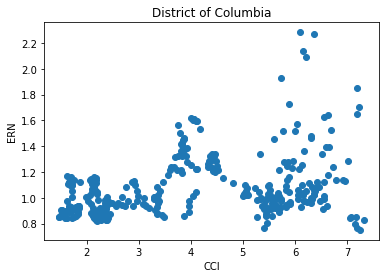

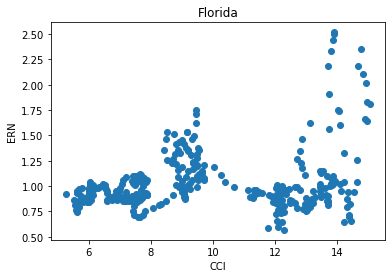

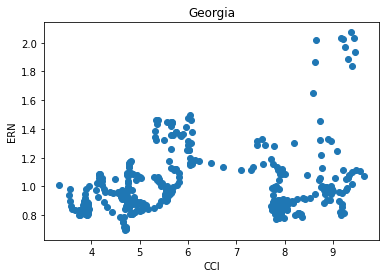

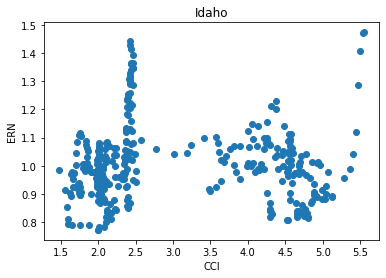

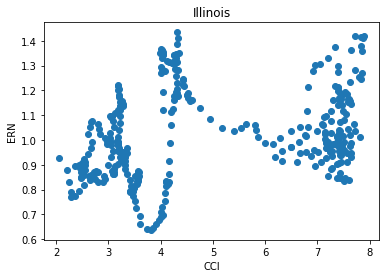

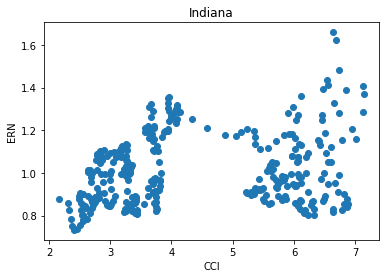

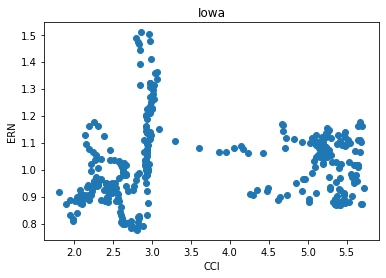

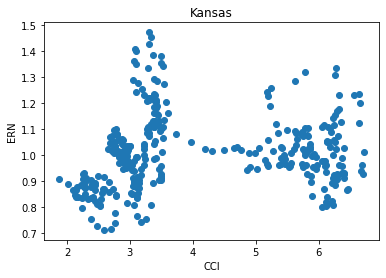

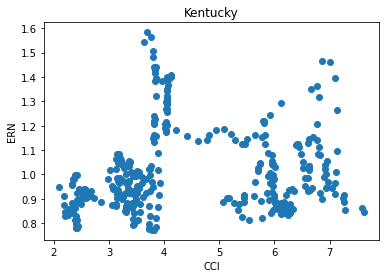

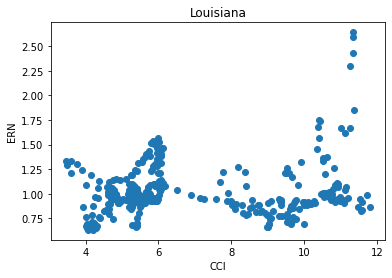

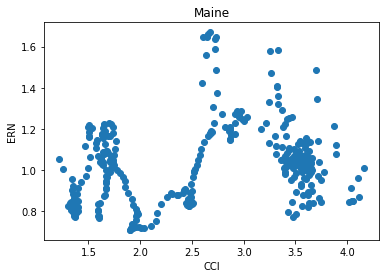

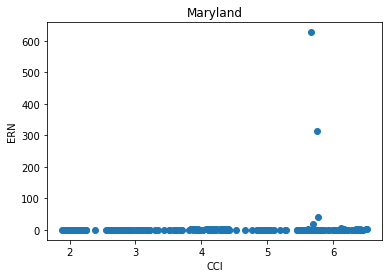

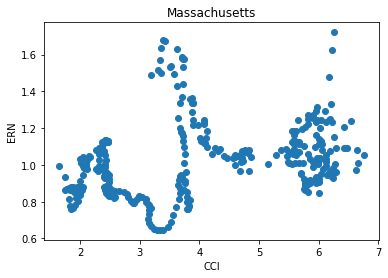

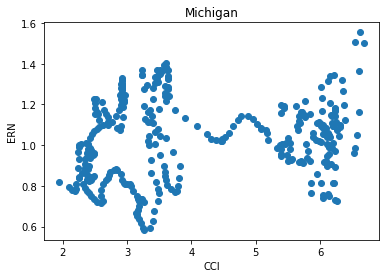

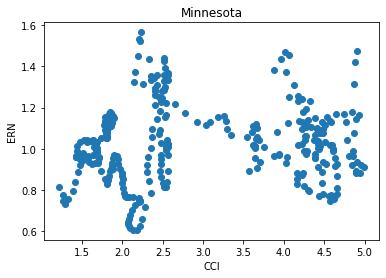

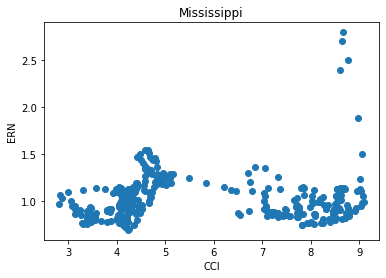

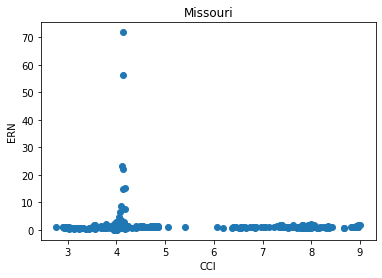

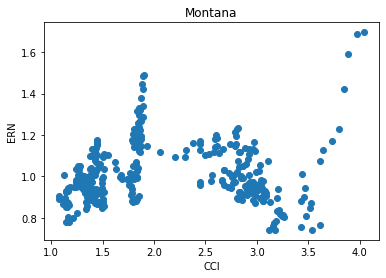

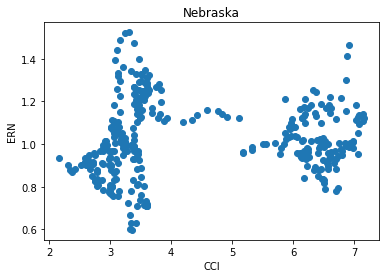

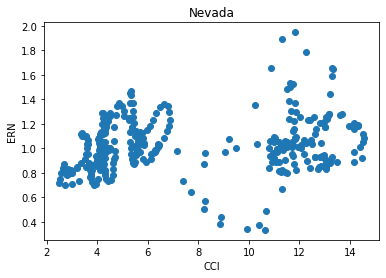

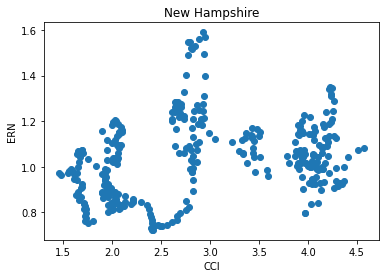

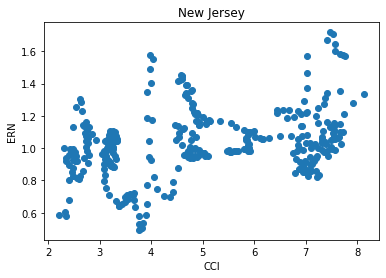

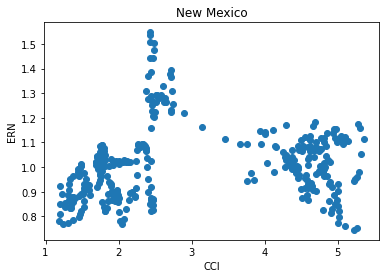

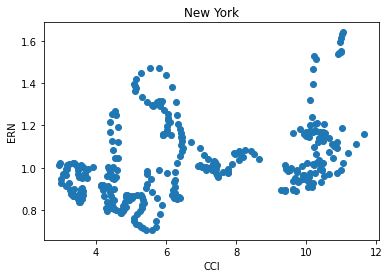

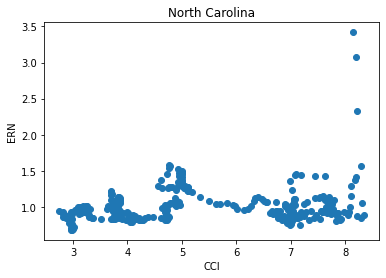

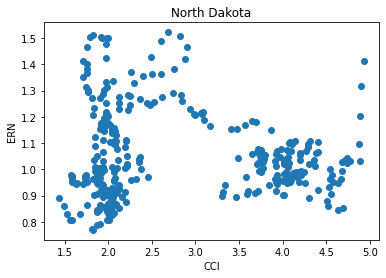

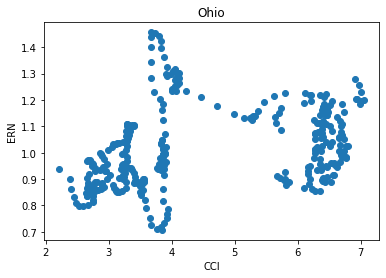

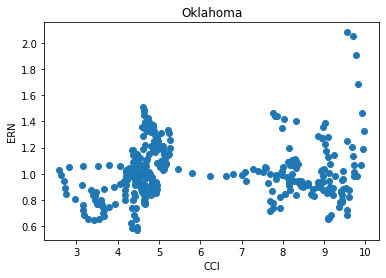

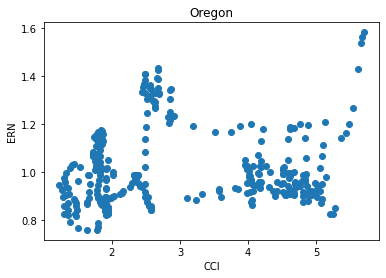

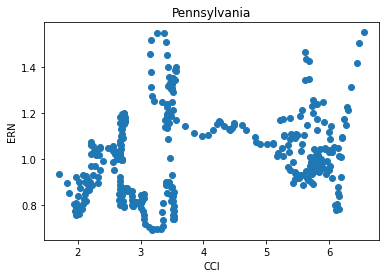

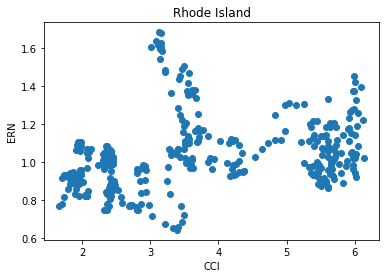

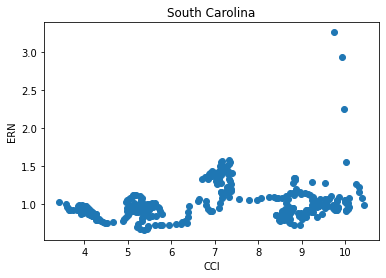

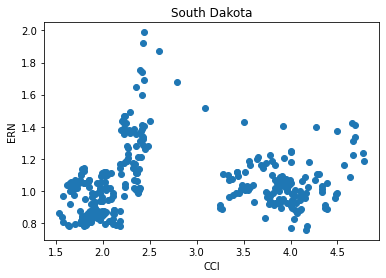

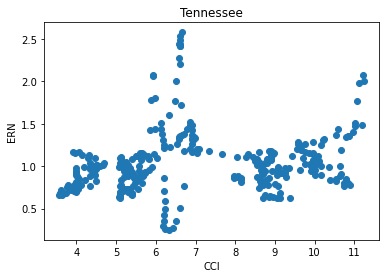

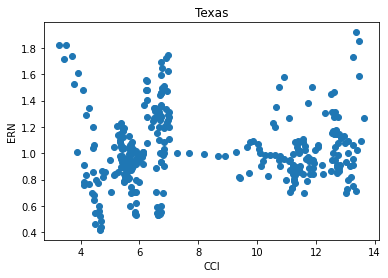

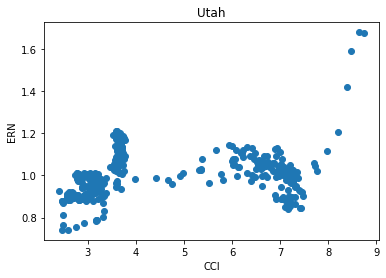

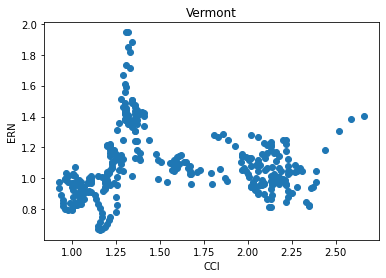

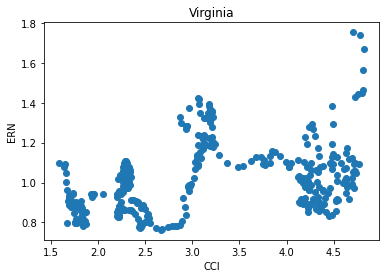

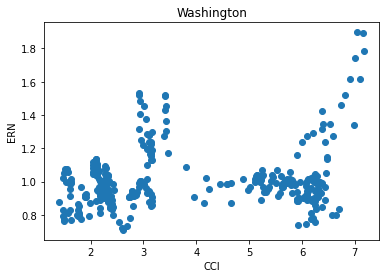

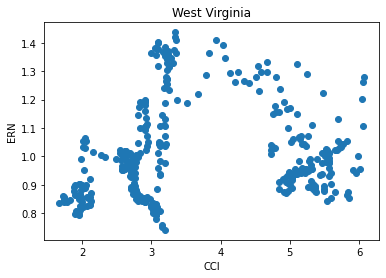

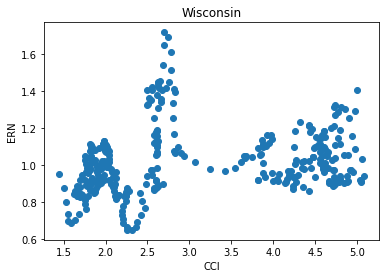

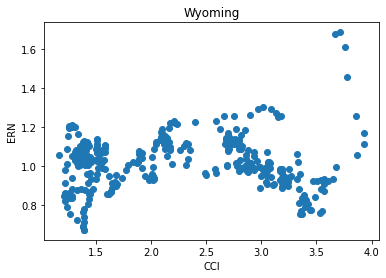

In [12]:
for state in cci.columns:
    plt.scatter(cci[state],df[state])
    plt.xlabel("CCI")
    plt.ylabel("ERN")
    plt.title(state)
    plt.show()